<a href="https://colab.research.google.com/github/allie-touchstone/Optimization/blob/main/topic1_NN_1_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf #tf likes np arrays as input
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# importing data 
mnist = tf.keras.datasets.mnist #object

(x_train, y_train),(x_test, y_test) = mnist.load_data() #load data loads the data from the tf servers
x_train, x_test = x_train / 255.0, x_test / 255.0 #divide so nunmbers go between 0 and 1

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0] #number of images, number of columns, number of rows, number of color channels(intensitiy)


In [14]:
x_train.shape #(images, pixel x pixel size,, color channels)

(60000, 28, 28)

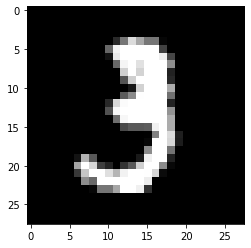

In [17]:
plt.imshow(x_train[10,:,:],cmap = 'gray'); #plot images, gray scale

In [20]:
x_train = x_train.reshape((ndata_train,28,28,1)) #b/w is 1 color channel/ grayscale intesnity 
x_test = x_test.reshape((ndata_test,28,28,1))


xshape = x_train.shape[1:4] #save each image as 28x28x1

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
xshape

(28, 28, 1)

In [25]:
# creating the NN
NNmodel = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=xshape),
        tf.keras.layers.Dense(64,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(64,activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

# NNmodel is where we save the NN, models inside keras inside tf
# want to make a sequential model so we can tell it which layer is which 
# seqential takes a list, which is the list of layers of the NN
# have 5 layers here, inside of a list

# first layer is ALWAYS input layer, 
  # have to tell it input_shape = 
  # flatten layer is converting the square to a single column
  # column will have 784 nodes in this one (28X28X1)

# 2nd layer
  # dense layer (fully connected, multi-persction)
  # this first hidden layer has 64 nodes
  # tell it which activiation function to use
  # regularizer (like lasso or ridges penltly function for just the weights and biases associated with this layer)
    # l1 is lasso   l2 is ridge
  #64 is the 'black magic' of NN
  # lamda is 0.0002

#  drop out layer will set it for each step of SGD, each layer gets its own 
  #set nodes on NN=0, will force nodes on layer before it to be equal to zero
  # 10%, so about 6 of the nodes will be zero at each individual training set

#4th layer
  # 64 nodes
  #sidmog activiation

# 5th layer
  #Output layer, needs to math number of things doing classification on 
  # in this case 10, number will be between 0-9
  # use softmax activation, because softmax makes probabilites 


In [29]:
# compile the model 
NNmodel.compile(optimizer='adam', # which optimizer you want to use
              loss='sparse_categorical_crossentropy', # loss function, what are you trying to miniimize, sparse means we dont have to do one-hot-endcoding ourselves 
              metrics=['accuracy']) #things tf will keep track of and tell us what they are, dont do optimiztion on it, just tell me what it is  

NNmodel.summary()

#first layer was a flatten layer wiht 784 nodes, dont need to pay attention to the 'none'
# then we has a dense layer with 64 nodes, then a dropout layer with 64 nodes
# another dense layer with 64 nodes
# a dense layer with 10 notes

#parameters are the weights +  biases


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
784*64 + 64 #(nodes)(weights)+(biases)


50240

In [30]:
# fit the training data, epoches, batch size, validation split (gonna hold off 20% of the data, so train on 80% of data)
NNmodel.fit(x_train,y_train,epochs=12,validation_split=0.2,batch_size=200)
#epoches: accuracly might level out or start to get worse
#accuracy is on the training set, val_accuracy on valadation set

Epoch 1/12
240/240 [==============================] - 2s 6ms/step - loss: 1.1901 - accuracy: 0.7662 - val_loss: 0.5887 - val_accuracy: 0.9050
Epoch 2/12
240/240 [==============================] - 1s 5ms/step - loss: 0.5463 - accuracy: 0.9018 - val_loss: 0.4390 - val_accuracy: 0.9262
Epoch 3/12
240/240 [==============================] - 1s 5ms/step - loss: 0.4385 - accuracy: 0.9203 - val_loss: 0.3713 - val_accuracy: 0.9366
Epoch 4/12
240/240 [==============================] - 1s 5ms/step - loss: 0.3783 - accuracy: 0.9309 - val_loss: 0.3259 - val_accuracy: 0.9443
Epoch 5/12
240/240 [==============================] - 1s 5ms/step - loss: 0.3420 - accuracy: 0.9385 - val_loss: 0.2990 - val_accuracy: 0.9512
Epoch 6/12
240/240 [==============================] - 1s 5ms/step - loss: 0.3127 - accuracy: 0.9445 - val_loss: 0.2734 - val_accuracy: 0.9557
Epoch 7/12
240/240 [==============================] - 1s 5ms/step - loss: 0.2897 - accuracy: 0.9491 - val_loss: 0.2573 - val_accuracy: 0.9567
Epoch 

In [31]:
print('This model predicts '+str(NNmodel.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')
# how we did on the test data

313/313 [==============================] - 1s 2ms/step - loss: 0.2076 - accuracy: 0.9679
This model predicts 96.78999781608582% of the test data correctly


In [32]:
# probability of each category 
pred_probs = NNmodel.predict(x_test)
pred_probs.shape
# 10000 images, each one we got 10 probabibilites, each one sums to one and takes the highest

(10000, 10)

In [39]:
np.sum(pred_probs[0,:])

1.0

In [42]:
pred_probs[2500,:]
#prediction for each value

array([2.7023059e-05, 9.2232591e-03, 9.7265166e-01, 1.0268380e-02,
       1.1221665e-05, 9.7641096e-05, 2.6476302e-04, 5.5281874e-03,
       1.9107519e-03, 1.7097833e-05], dtype=float32)

In [40]:
pred_class = np.argmax(pred_probs, axis=1)
#argmax finds the index of the biggest value
#axis = 1, find the index of each column with the biggest class

np.mean(pred_class==y_test)
#how often are these right?

0.9679

In [35]:
NNmodel2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

In [36]:
NNmodel2 = tf.keras.models.Sequential()
NNmodel2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape))
NNmodel2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2))
NNmodel2.add(tf.keras.layers.Flatten())
NNmodel2.add(tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)))
NNmodel2.add(tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0005)))
NNmodel2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [37]:
NNmodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1440)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               184448    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                      

In [38]:
NNmodel2.fit(x_train,y_train,epochs=5,validation_split=0.2,batch_size=500)

Epoch 1/5
96/96 [==============================] - 14s 142ms/step - loss: 1.6513 - accuracy: 0.8295 - val_loss: 0.9874 - val_accuracy: 0.9296
Epoch 2/5
96/96 [==============================] - 13s 139ms/step - loss: 0.8507 - accuracy: 0.9321 - val_loss: 0.7181 - val_accuracy: 0.9482
Epoch 3/5
96/96 [==============================] - 13s 139ms/step - loss: 0.6545 - accuracy: 0.9503 - val_loss: 0.5860 - val_accuracy: 0.9597
Epoch 4/5
96/96 [==============================] - 13s 139ms/step - loss: 0.5517 - accuracy: 0.9578 - val_loss: 0.5111 - val_accuracy: 0.9637
Epoch 5/5
96/96 [==============================] - 13s 139ms/step - loss: 0.4848 - accuracy: 0.9643 - val_loss: 0.4505 - val_accuracy: 0.9721


In [ ]:
NNmodel2.predict(x_test)

In [ ]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

## Functional API
we will need this eventually when we do reinforcement learning

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input

In [ ]:
imp = Input(shape=xshape)
mid = Conv2D(16,(8,8),strides=4,activation='relu')(imp)
mid = Conv2D(32,(4,4),strides=2,activation='relu')(mid)
mid = Flatten()(mid)
mid = Dense(256,activation='relu')(mid)
out0 = Dense(10,activation='softmax')(mid)
model = Model(imp,out0)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()